# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

C:\Users\mike4\Anaconda\envs\nlpenv\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
load_dotenv()

True

In [3]:
# Read your api key environment variable

api_key = os.getenv("NEWS_API_KEY")



In [4]:
# Create a newsapi client

newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles

bitcoin_news = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [6]:
print(f"Total articles about Bitcoin: {bitcoin_news['totalResults']}")

Total articles about Bitcoin: 4701


In [52]:
#show sample article

bitcoin_news["articles"][12]

{'source': {'id': None, 'name': 'BBC News'},
 'author': 'https://www.facebook.com/bbcnews',
 'title': 'Cryptocurrency: Bitcoin hits three-year high as investors jump in - BBC News',
 'description': "<ol><li>Cryptocurrency: Bitcoin hits three-year high as investors jump in\xa0\xa0BBC News\r\n</li><li>Bitcoin jumps to three-year high as Covid crisis changes investor outlook\xa0\xa0The Guardian\r\n</li><li>Bitcoin to surpass record price high due to drive from 'real volume…",
 'url': 'https://www.bbc.com/news/business-54982604',
 'urlToImage': 'https://ichef.bbci.co.uk/news/1024/branded_news/FE00/production/_115542056_bitcoin.jpg',
 'publishedAt': '2020-11-18T03:30:00Z',
 'content': "By Justin HarperBusiness reporter, BBC News\r\nimage copyrightGetty Images\r\nBitcoin, the world's best-known cryptocurrency, has jumped above $17,000 (£12,800) to hit a three-year high.\r\nThe digital cur… [+3044 chars]"}

In [8]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(
    q="Ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [9]:
print(f"Total articles about Ethereum: {ethereum_news['totalResults']}")

Total articles about Ethereum: 1283


In [10]:
ethereum_news["articles"][20]

{'source': {'id': 'reuters', 'name': 'Reuters'},
 'author': 'Tom Wilson',
 'title': 'Bitcoin breaks $17,000 as 2020 rally powers on - Reuters',
 'description': 'Bitcoin passed $17,000 on Tuesday to touch its highest level this year, with investors ascribing the gains to demand for its perceived inflation-resistant qualities and expectations of wider mainstream acceptance.',
 'url': 'https://www.reuters.com/article/crypto-currencies-int-idUSKBN27X26V',
 'urlToImage': 'https://static.reuters.com/resources/r/?m=02&d=20201117&t=2&i=1541512097&r=LYNXMPEGAG19Q&w=800',
 'publishedAt': '2020-11-17T15:59:00Z',
 'content': 'LONDON (Reuters) - Bitcoin passed $17,000 on Tuesday to touch its highest level this year, with investors ascribing the gains to demand for its perceived inflation-resistant qualities and expectation… [+2152 chars]'}

In [11]:
# Create the Bitcoin sentiment scores DataFrame

bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

In [12]:
bitcoin_news_df = pd.DataFrame(bitcoin_sentiments)
cols = ["compound", "negative", "neutral", "positive", "text"]
bitcoin_news_df = bitcoin_news_df[cols]

bitcoin_news_df.head()

,compound,negative,neutral,positive,text
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...
1,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,..."
2,0.0000,0.000,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent..."
3,0.4404,0.075,0.773,0.152,If youve been watching the crypto markets over...
4,0.0000,0.000,1.000,0.000,Six years after the launch of the Mexico-based...


In [13]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

In [14]:
ethereum_news_df = pd.DataFrame(ethereum_sentiments)
cols = ["compound", "negative", "neutral", "positive", "text"]
ethereum_news_df = ethereum_news_df[cols]

ethereum_news_df.head()

,compound,negative,neutral,positive,text
0,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
2,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...
3,0.1779,0.0,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...
4,0.1779,0.0,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...


In [15]:
# Describe the Bitcoin Sentiment

bitcoin_news_df.describe()

,compound,negative,neutral,positive
count,99.000000,99.000000,99.000000,99.000000
mean,0.154510,0.018141,0.926717,0.055152
std,0.326482,0.046739,0.077543,0.065729
min,-0.946800,0.000000,0.637000,0.000000
25%,0.000000,0.000000,0.860500,0.000000
50%,0.000000,0.000000,0.948000,0.050000
75%,0.396900,0.000000,1.000000,0.117000
max,0.877900,0.363000,1.000000,0.318000


In [16]:
# Describe the Ethereum Sentiment
ethereum_news_df.describe()

,compound,negative,neutral,positive
count,96.000000,96.000000,96.000000,96.000000
mean,0.243635,0.021219,0.896615,0.082156
std,0.350801,0.047167,0.092644,0.078330
min,-0.779200,0.000000,0.653000,0.000000
25%,0.000000,0.000000,0.838250,0.000000
50%,0.250000,0.000000,0.913000,0.074000
75%,0.493900,0.000000,1.000000,0.132250
max,0.883400,0.239000,1.000000,0.347000


### Questions:

Q: Which coin had the highest mean positive score?

A:  ETHEREUM

Q: Which coin had the highest compound score?

A: BITCOIN

Q. Which coin had the highest positive score?

A: BITCOIN

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [17]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mike4\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mike4\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
lem = WordNetLemmatizer()

In [19]:
# Expand the default stopwords list if necessary
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [20]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    words = word_tokenize(text)
    #Create a list of the words 
    sw = set(stopwords.words('english'))
    #Convert the words to lowercase
    words = list(filter(lambda x: x.lower(), words))
    #Remove the punctuation
    words = list(filter(lambda y: y not in punctuation, words))
    #Remove the stop words
    words = list(filter(lambda z: z.lower() not in sw, words))
    #Lemmatize Words into root words
    tokens = [lem.lemmatize(word) for word in words]
    
    return tokens

In [21]:
bitcoin_news_df['tokens'] = bitcoin_news_df.text.apply(tokenizer)
bitcoin_news_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...,"[Visa, partnered, cryptocurrency, startup, Blo..."
1,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,...","[November, 2017, absolutely, massive, two-mont..."
2,0.0000,0.000,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent...","[Unlike, ‘, conventional, ’, cryptocurrencies,..."
3,0.4404,0.075,0.773,0.152,If youve been watching the crypto markets over...,"[youve, watching, crypto, market, past, week, ..."
4,0.0000,0.000,1.000,0.000,Six years after the launch of the Mexico-based...,"[Six, year, launch, Mexico-based, crypotcurren..."


In [22]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
ethereum_news_df['tokens'] = ethereum_news_df.text.apply(tokenizer)
ethereum_news_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[FILE, PHOTO, Representation, Ethereum, virtua..."
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[FILE, PHOTO, Representation, Ethereum, virtua..."
2,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...,"[LONDON, Reuters, Digital, currency, Ethereum,..."
3,0.1779,0.0,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...,"[NEW, YORK, Reuters, Institutional, investor, ..."
4,0.1779,0.0,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...,"[NEW, YORK, Reuters, Institutional, investor, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [23]:
from collections import Counter
from nltk import ngrams

In [24]:
# Generate the Bitcoin N-grams where N=2

ngrams_btc = [item for sublist in bitcoin_news_df.tokens.to_list() for item in sublist]
btc_counts = Counter(ngrams(ngrams_btc, n=2))
btc_counts.most_common(10)

[(('FILE', 'PHOTO'), 31),
 (('virtual', 'currency'), 30),
 (('Reuters', 'Bitcoin'), 27),
 (('currency', 'Bitcoin'), 23),
 (('illustration', 'taken'), 23),
 (('2020', 'REUTERS/Dado'), 23),
 (('char', 'Reuters'), 22),
 (('Reuters', 'Staff'), 21),
 (('LONDON', 'Reuters'), 21),
 (('Bitcoin', 'seen'), 19)]

In [25]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!

ngrams_eth = [item for sublist in ethereum_news_df.tokens.to_list() for item in sublist]
eth_counts = Counter(ngrams(ngrams_eth, n=2))
eth_counts.most_common(10)

[(('char', 'Ethereum'), 11),
 (('virtual', 'currency'), 9),
 (('Ethereum', '2.0'), 9),
 (('FILE', 'PHOTO'), 8),
 (('char', 'Bitcoin'), 8),
 (('YORK', 'Reuters'), 7),
 (('currency', 'Bitcoin'), 7),
 (('illustration', 'taken'), 7),
 (('2020', 'REUTERS/Dado'), 7),
 (('LONDON', 'Reuters'), 6)]

In [31]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [32]:
# Get the top 10 words for Bitcoin
token_count(ngrams_btc)

[('char', 98),
 ('Bitcoin', 75),
 ('Reuters', 74),
 ('currency', 39),
 ('virtual', 33),
 ('2020', 33),
 ('FILE', 31),
 ('PHOTO', 31),
 ('taken', 31),
 ('seen', 27)]

In [33]:
# Get the top 10 words for Ethereum

token_count(ngrams_eth)

[('char', 96),
 ('Ethereum', 51),
 ('Bitcoin', 26),
 ('…', 21),
 ('Reuters', 20),
 ('bitcoin', 17),
 ("'s", 16),
 ('cryptocurrency', 15),
 ('asset', 14),
 ('price', 14)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

<function matplotlib.pyplot.show(close=None, block=None)>

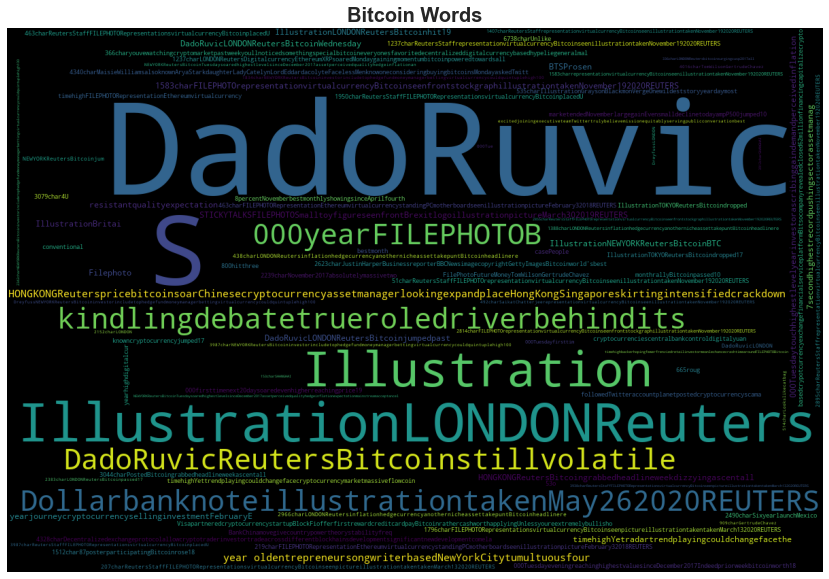

In [48]:
# Generate the Bitcoin word cloud
wc = WordCloud(width=1200, height=800, max_words=100).generate("".join(ngrams_btc))
plt.imshow(wc)
plt.axis("off")
fontdict={"fontsize":20, "fontweight":"bold"}
plt.title("Bitcoin Words", fontdict=fontdict)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

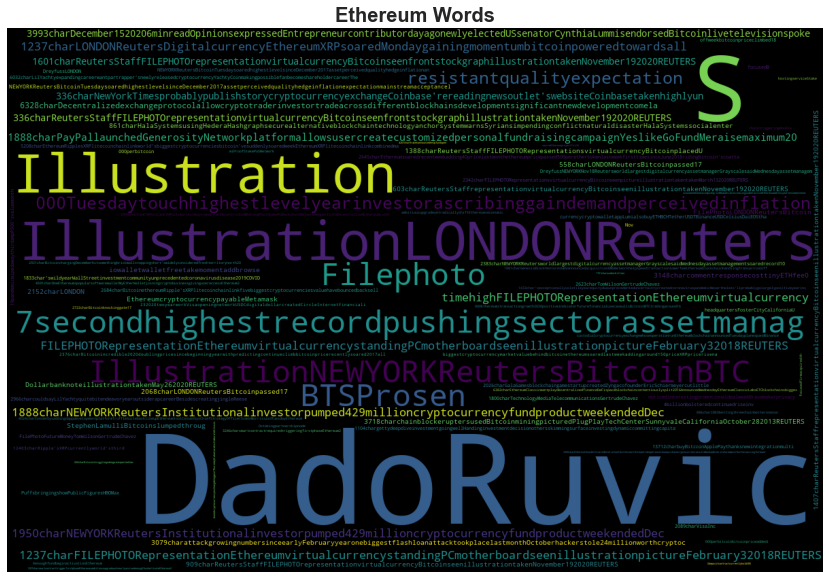

In [47]:
# Generate the Ethereum word cloud
wc = WordCloud(width=1200, height=800, max_words=100).generate("".join(ngrams_eth))
plt.imshow(wc)
plt.axis("off")
fontdict={"fontsize":20, "fontweight":"bold"}
plt.title("Ethereum Words", fontdict=fontdict)
plt.show

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [57]:
import spacy
from spacy import displacy

In [ ]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [58]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [86]:
# Concatenate all of the bitcoin text together

article = bitcoin_news["articles"]
bitcoinn = " "
for i in bitcoin_news["articles"]:
    bitcoinn+=str(i)


In [93]:
# Run the NER processor on all of the text
doc = nlp(bitcoinn)

# Add a title to the document

doc.user_data["title"] = "Bitcoin NLP NER"

In [94]:
# Render the visualization
displacy.render(doc, style='ent')

In [83]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Lifehacker.com ORG
Mike Winters PERSON
Two Cents MONEY
Mike Winters PERSON
Lifehacker ORG
the New Visa Bitcoin Rewards Card ORG
first ORDINAL
Bitcoin GPE
2020-12-03T22:00:00Z' DATE
first ORDINAL
Bitcoin GPE
Stan Schroeder' PERSON
Bitcoin GPE
20,000 MONEY
November 2017 DATE
two-month DATE
Bitcoin GPE
10,000 MONEY
first ORDINAL
the next 20 days DATE
19,665 MONEY
roughly $329 billion MONEY
CoinGecko.\xa0\nThe…', ' ORG
2020-11-20T20:02:17Z DATE
November 2017 DATE
two-month DATE
Bitcoin GPE
10,000 MONEY
first ORDINAL
the next 20 days DATE
19,665 MONEY
Jon Fingas' PERSON
China GPE
China GPE
Reuters ORG
JD.com PERSON
first ORDINAL
2020-12-06T22:37:18Z' DATE
digital yuan ORG
the People’s Bank of China ORG
Gizmodo.com ORG
John Biggs' PERSON
Bitcoin GPE
20 MONEY
the past few weeks DATE
bitcoin GPE
digital ORG
hype GPE
20,000—if MONEY
2020-11-25T23:00:00Z' DATE
the past few weeks DATE
bitcoin GPE
digital ORG
hype GPE
TechCrunch PERSON
Jonathan Shieber' PERSON
Latin American NORP
Mexico GPE
Bitso 

---

## Ethereum NER

In [96]:
# Concatenate all of the bitcoin text togethe
eth_article = ethereum_news["articles"]

ethereumc = " "
for e in ethereum_news["articles"]:
    ethereumc+=str(e)



In [97]:
# Run the NER processor on all of the text

doc = nlp(ethereumc)

# Add a title to the document
doc.user_data["title"] = "Ethereum NLP NER"

In [98]:
# Render the visualization
displacy.render(doc, style="ent")

In [99]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Reuters ORG
Tom Wilson' PERSON
Reuters ORG
XRP ORG
Monday DATE
2020-11-23T14:16:00Z' DATE
February 3, 2018 DATE
REUTERS/Dado Ruvic/Illustration\r\nLONDON ORG
Reuters ORG
Reuters ORG
Tom Wilson' PERSON
Reuters ORG
XRP ORG
Monday DATE
2020-11-23T14:16:00Z' DATE
February 3, 2018 DATE
REUTERS/Dado Ruvic/Illustration\r\nLONDON ORG
Reuters ORG
Reuters ORG
Tom Wilson' PERSON
Reuters India' ORG
XRP ORG
Monday DATE
2020-11-23T14:48:00Z' DATE
LONDON GPE
Reuters ORG
XRP ORG
Monday DATE
Reuters ORG
Chavez-Dreyfuss' PERSON
Crypto GPE
second ORDINAL
Coinshares - Reuters UK' ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
$15 billion MONEY
Monday DATE
2020-12-07T20:26:00Z' DATE
NEW YORK GPE
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
Reuters ORG
Chavez-Dreyfuss' PERSON
Crypto GPE
second ORDINAL
Coinshares - Reuters' ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
$15 billion MONEY
Monday DATE
2020-12-07T20:22:00Z' DATE
NEW YORK GPE
Reuter